In [2]:
import cudf
import cuml
import cupy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datashader.utils as utils
import datashader as ds
import datashader.transfer_functions as tf

pal = [
 '#9e0142',
 '#d8434e',
 '#f67a49',
 '#fdbf6f',
 '#feeda1',
 '#f1f9a9',
 '#bfe5a0',
 '#74c7a5',
 '#378ebb',
 '#5e4fa2'
]
color_key = {str(d):c for d,c in enumerate(pal)}

In [1]:
nomefile = "archive/fashion-mnist_test.csv"

In [3]:
# Using cudf Dataframe here is not likely to help with performance
# However, it's a good opportunity to get familiar with the API
source_df = cudf.read_csv(nomefile)

In [4]:
source_df.columns[0]

'label'

In [5]:
data = source_df.loc[:, source_df.columns[1:]]
target = source_df["label"]

In [6]:
%%time
reducer = cuml.UMAP(
    n_neighbors=15,
    n_components=2,
    n_epochs=500,
    min_dist=0.1
)
embedding = reducer.fit_transform(data)

CPU times: user 3.35 s, sys: 775 ms, total: 4.13 s
Wall time: 6.44 s


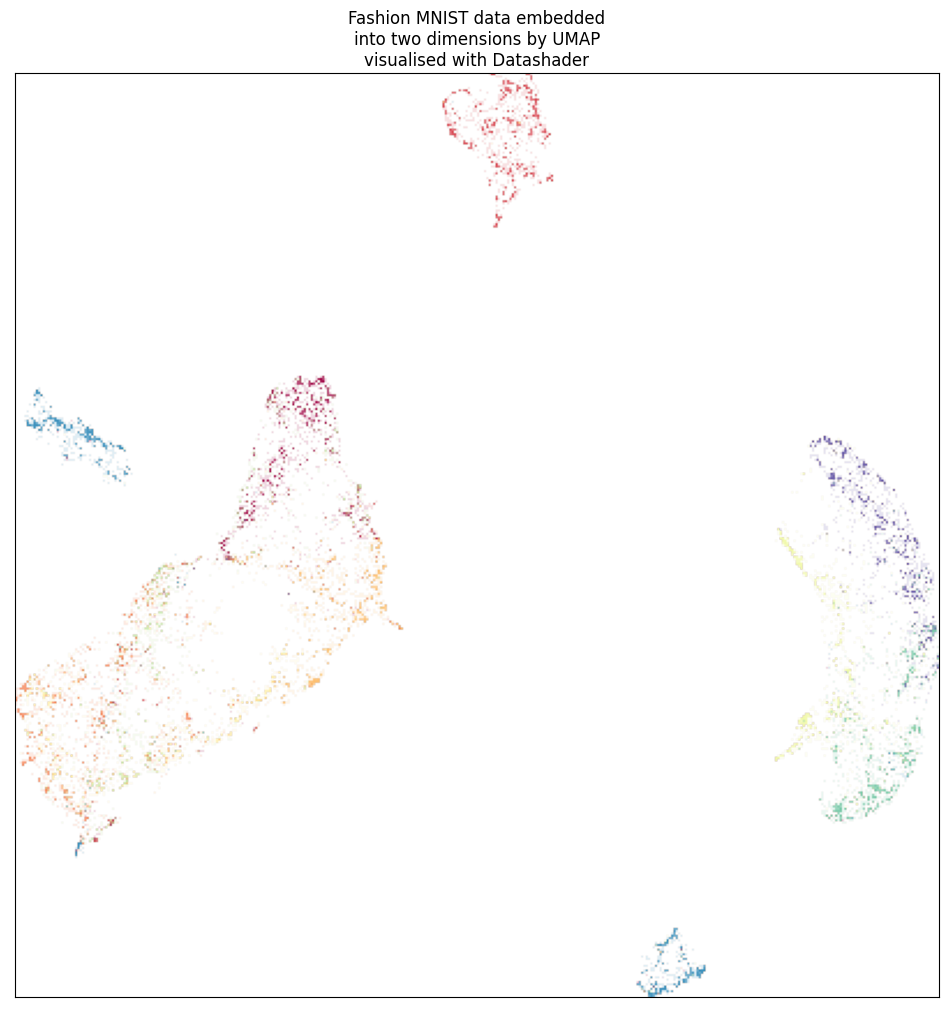

In [22]:
df = embedding.to_pandas()
df.columns = ["x", "y"]
df['class'] = pd.Series([str(x) for x in target.to_numpy()], dtype="category")

cvs = ds.Canvas(plot_width=400, plot_height=400)
agg = cvs.points(df, 'x', 'y', ds.count_cat('class'))
img = tf.shade(agg, color_key=color_key, how='eq_hist')

utils.export_image(img, filename='fashion-mnist')#, background='black')

image = plt.imread('fashion-mnist.png')
fig, ax = plt.subplots(figsize=(12, 12))
plt.imshow(image)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Fashion MNIST data embedded\n"
          "into two dimensions by UMAP\n"
          "visualised with Datashader",
          fontsize=12)

plt.show()

In [6]:
nodeembc1 = np.load("nodeembc1.npy")
nodeembc2 = np.load("nodeembc2.npy")

In [7]:
nodeembc2.shape

(20000, 2)

In [8]:
%%time
reducer = cuml.UMAP(
    n_neighbors=55,
    n_components=2,
    n_epochs=10000,
    min_dist=1
)
embedding1 = reducer.fit_transform(nodeembc1)

reducer = cuml.UMAP(
    n_neighbors=55,
    n_components=2,
    n_epochs=10000,
    min_dist=1
)
embedding2 = reducer.fit_transform(nodeembc2)

CPU times: user 2.96 s, sys: 1.48 s, total: 4.45 s
Wall time: 4.46 s


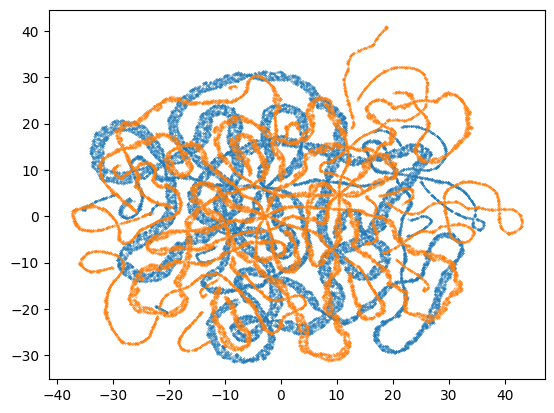

In [9]:
plt.scatter(*embedding2.T, s=0.1)
plt.scatter(*embedding1.T, s=0.1)

In [10]:
nodeembc1_nolinear = np.load("nodeembc1_nolinear.npy")
nodeembc2_nolinear = np.load("nodeembc2_nolinear.npy")

In [23]:
%%time
reducer = cuml.UMAP(
    n_neighbors=50,
    n_components=2,
    n_epochs=1000,
    min_dist=0.01
)
embedding1_nolinear = reducer.fit_transform(nodeembc1_nolinear)

reducer = cuml.UMAP(
    n_neighbors=50,
    n_components=2,
    n_epochs=1000,
    min_dist=0.01
)
embedding2_nolinear = reducer.fit_transform(nodeembc2_nolinear)

CPU times: user 551 ms, sys: 14.4 ms, total: 566 ms
Wall time: 565 ms


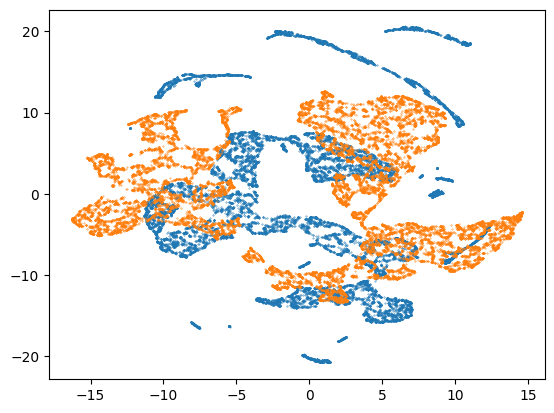

In [24]:
plt.scatter(*embedding2_nolinear.T, s=0.1)
plt.scatter(*embedding1_nolinear.T, s=0.1)